In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

%matplotlib inline

## Scatter plots

In [3]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


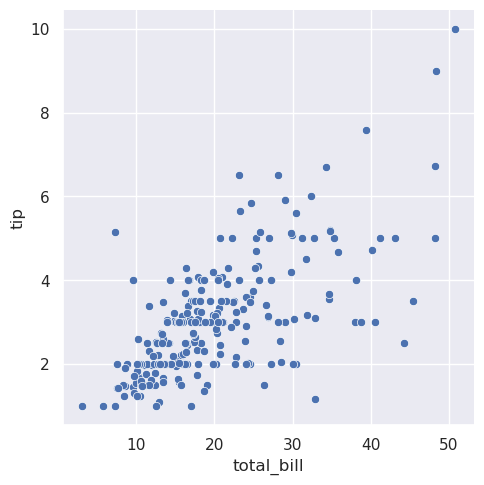

In [4]:
sns.relplot(
    data=tips, x="total_bill", y="tip"
)

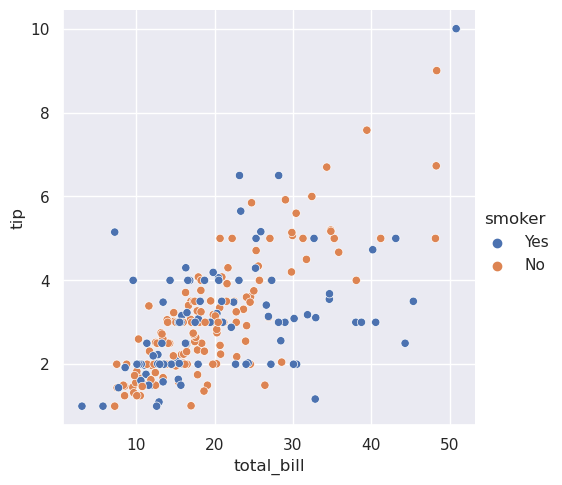

In [5]:
# Add another dimension by means of color (hue semantic)
sns.relplot(
    data=tips, x="total_bill", y="tip",
    hue="smoker"
)

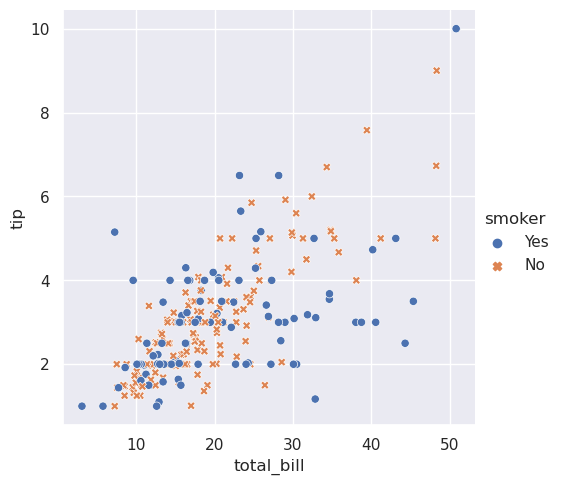

In [6]:
# Different marker style for each class
sns.relplot(
    data = tips, x="total_bill",
    y = "tip", hue="smoker", style="smoker"
)

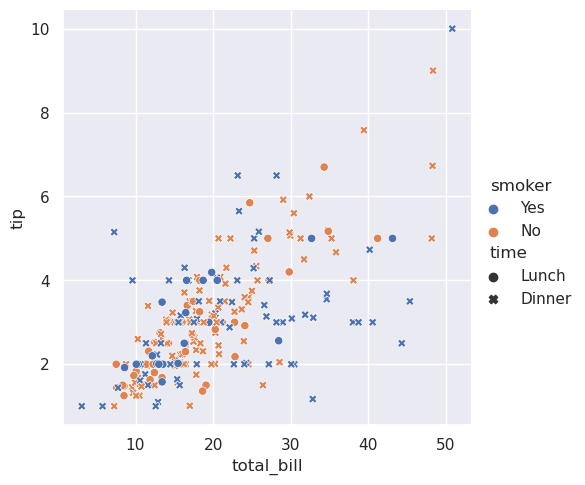

In [7]:
# More variables changing the hue and style independently
sns.relplot(
    data=tips, x="total_bill", y="tip",
    hue="smoker", style="time"
)

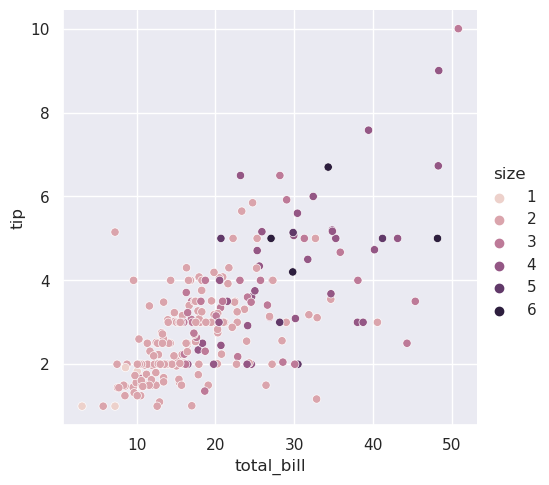

In [8]:
sns.relplot(
    data=tips, x="total_bill",
    y="tip", hue="size"
)

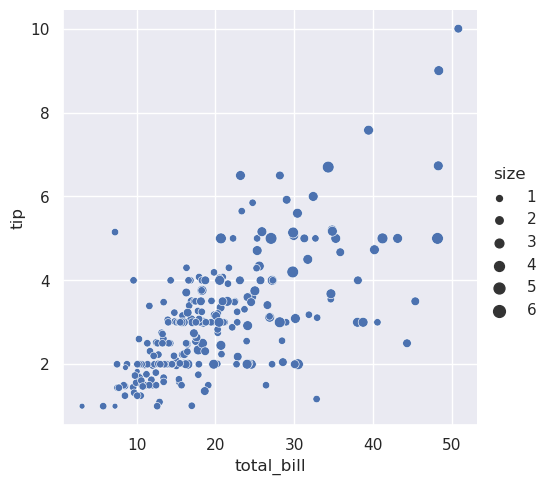

In [9]:
# Changing the size of each point
sns.relplot(
    data=tips, x="total_bill", y="tip",
    size="size"
)

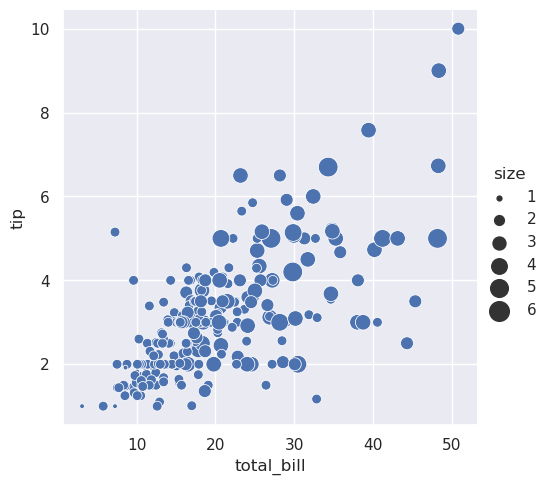

In [10]:
# Customizing range for size definition
sns.relplot(
    data=tips, x="total_bill", y="tip",
    size="size", sizes=(12, 200)
)

## Line plots

In [11]:
dowjones = sns.load_dataset("dowjones")
dowjones

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45
...,...,...
644,1968-08-01,883.72
645,1968-09-01,922.80
646,1968-10-01,955.47
647,1968-11-01,964.12


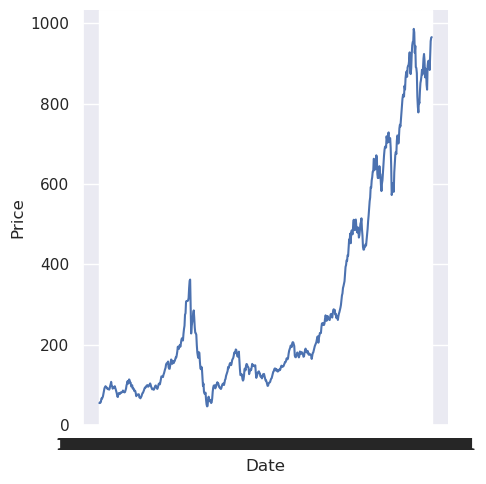

In [12]:
sns.relplot(
    data=dowjones, x="Date", y="Price",
    kind="line"
)

## Aggregation and representing uncertainty

The confidence interval plotted by means of Seaborn is a 95% confidence

In [5]:
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


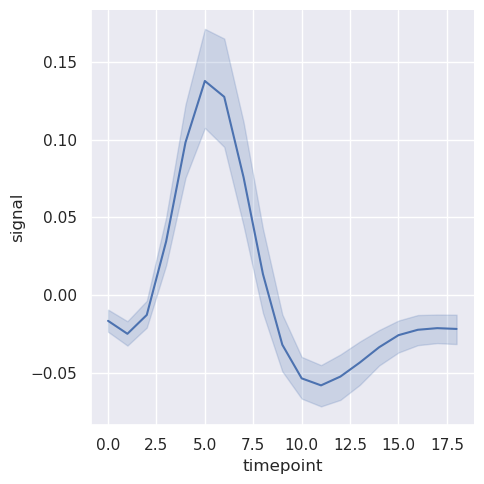

In [14]:
sns.relplot(
    data=fmri, x="timepoint", y="signal",
    kind="line"
)

## Disabling the confidence interval

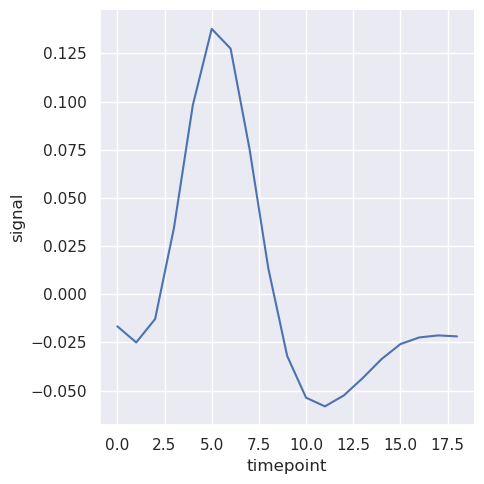

In [7]:
sns.relplot(
    data=fmri, kind="line", x="timepoint",
    y="signal", ci=None
)

## Standard deviation instead of confidence interval

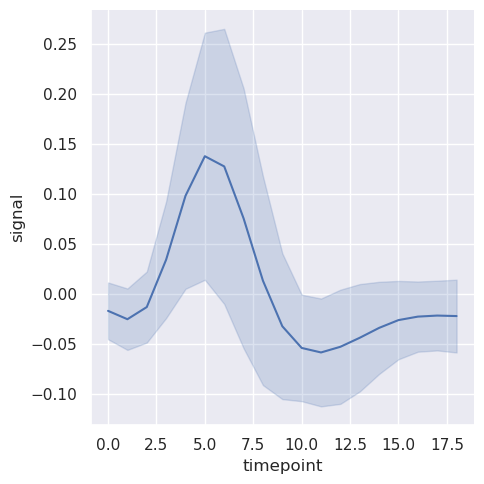

In [10]:
sns.relplot(
    data=fmri, kind="line", x="timepoint",
    y="signal", ci="sd"
)

## Disabling the aggregation

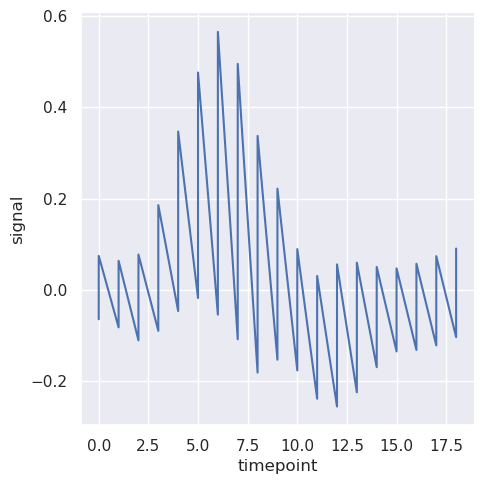

In [11]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    estimator=None
)

## Plotting with semantic mappings

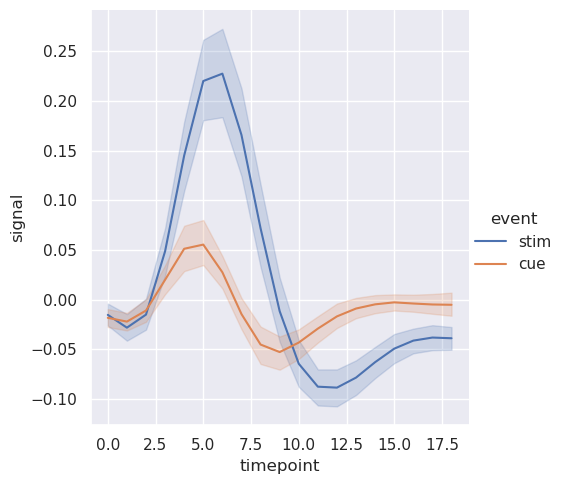

In [17]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event"
)

## Adding style semantic

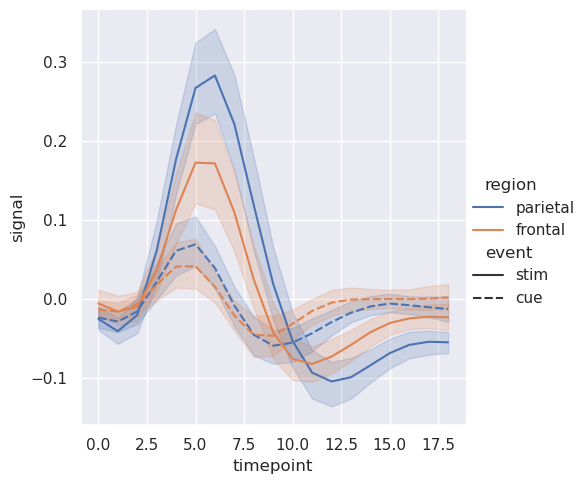

In [18]:
sns.relplot(
    data=fmri, kind="line", x="timepoint",
    y="signal", hue="region", style="event"
)

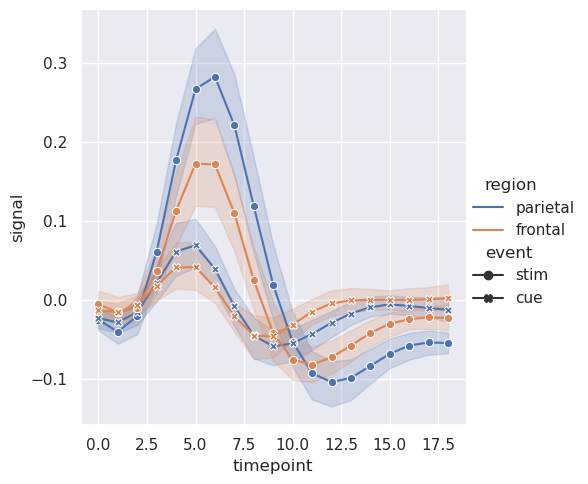

In [19]:
# Adding markers
sns.relplot(
    data=fmri, kind="line", x="timepoint",
    y="signal", hue="region", style="event",
    dashes=False, markers=True
)

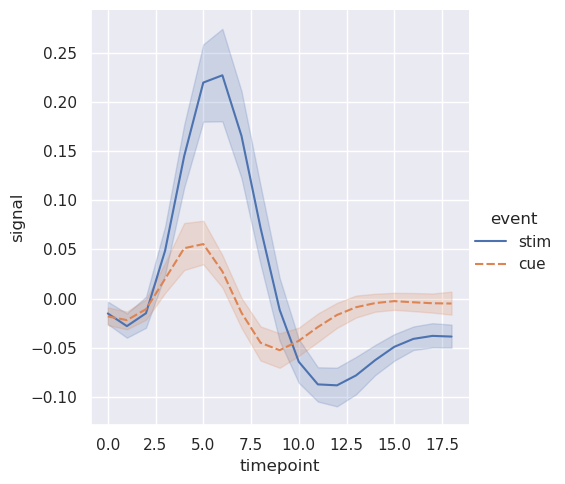

In [20]:
sns.relplot(
    data=fmri, kind="line", x="timepoint",
    y="signal", hue="event", style="event"
)

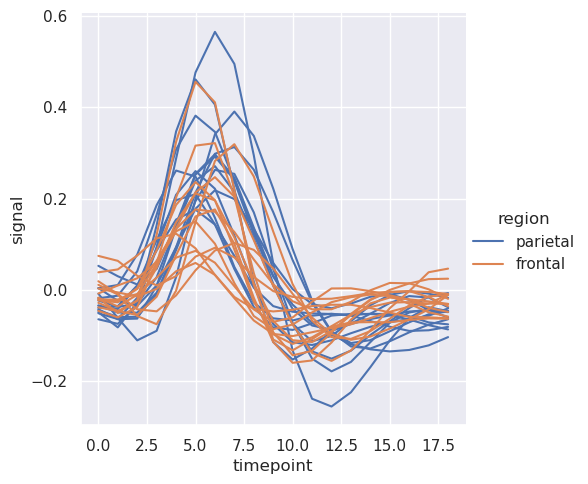

In [26]:
# Plotting reapeted measured data (plot each sampling unit separately)
sns.relplot(
    data=fmri.query("event == 'stim'"), kind="line",
    x="timepoint", y="signal", hue="region", 
    units="subject", estimator=None
)

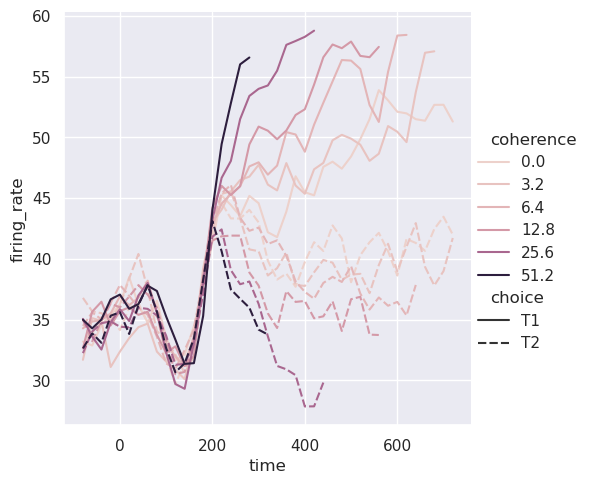

In [34]:
# Numerical "hue semantic"
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(
    data=dots, kind="line", x="time",
    y="firing_rate", hue="coherence", style="choice"
)

## Controlling sorting and orientation

The default behavior is to sort the data by the x values

However, this can be disabled

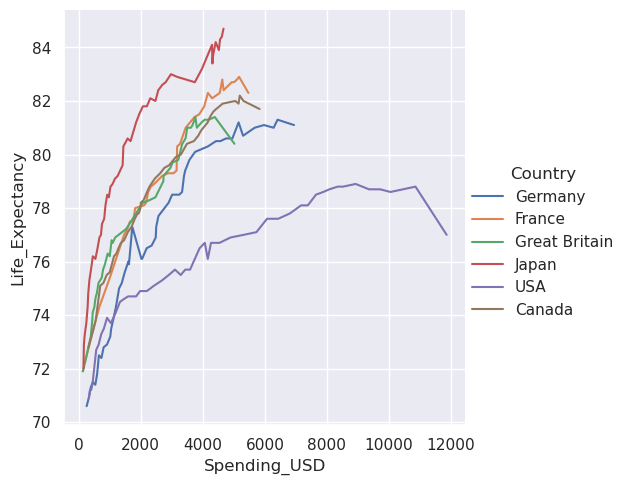

In [43]:
healthexp = sns.load_dataset("healthexp").sort_values("Year")
sns.relplot(
    data=healthexp, kind="line", x="Spending_USD",
    y="Life_Expectancy", hue="Country", sort="False"
)

AttributeError: 'Line2D' object has no property 'orient'

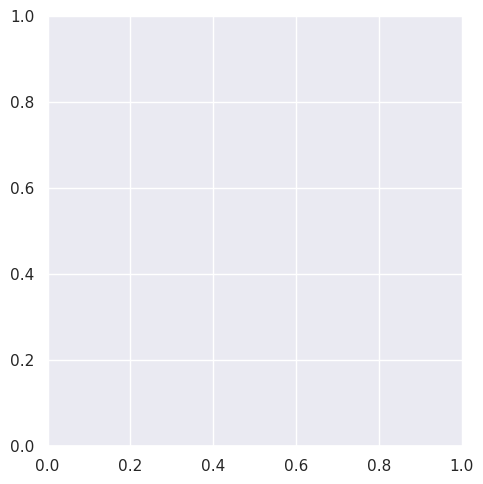

In [45]:
# Sorting and aggregating along the y axis
sns.relplot(
    data=fmri, kind="line", x="signal",
    y="timepoint", hue="event",
    orient="y"
)

## Multiple relationships with facets

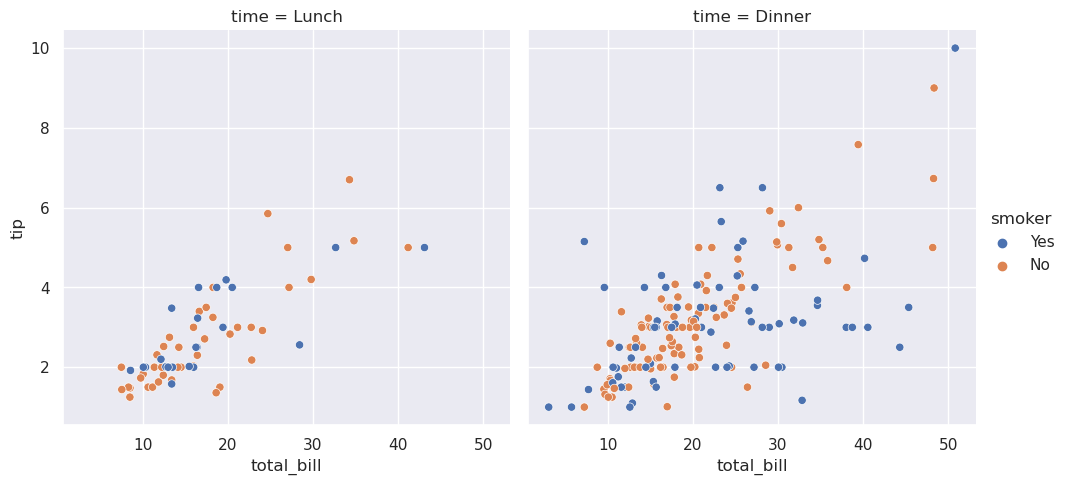

In [47]:
sns.relplot(
    data=tips, x="total_bill", y="tip",
    hue="smoker", col="time"
)

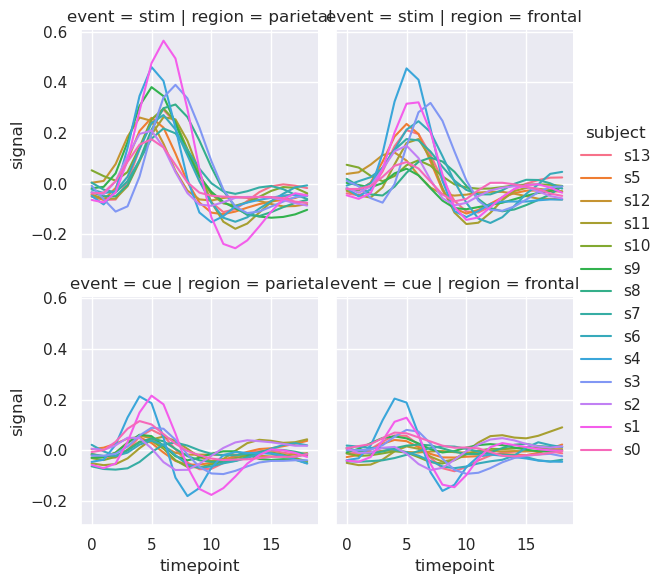

In [50]:
sns.relplot(
    data=fmri, kind="line", x="timepoint",
    y="signal", hue="subject", col="region",
    row="event", height=3,
    estimator=None
)

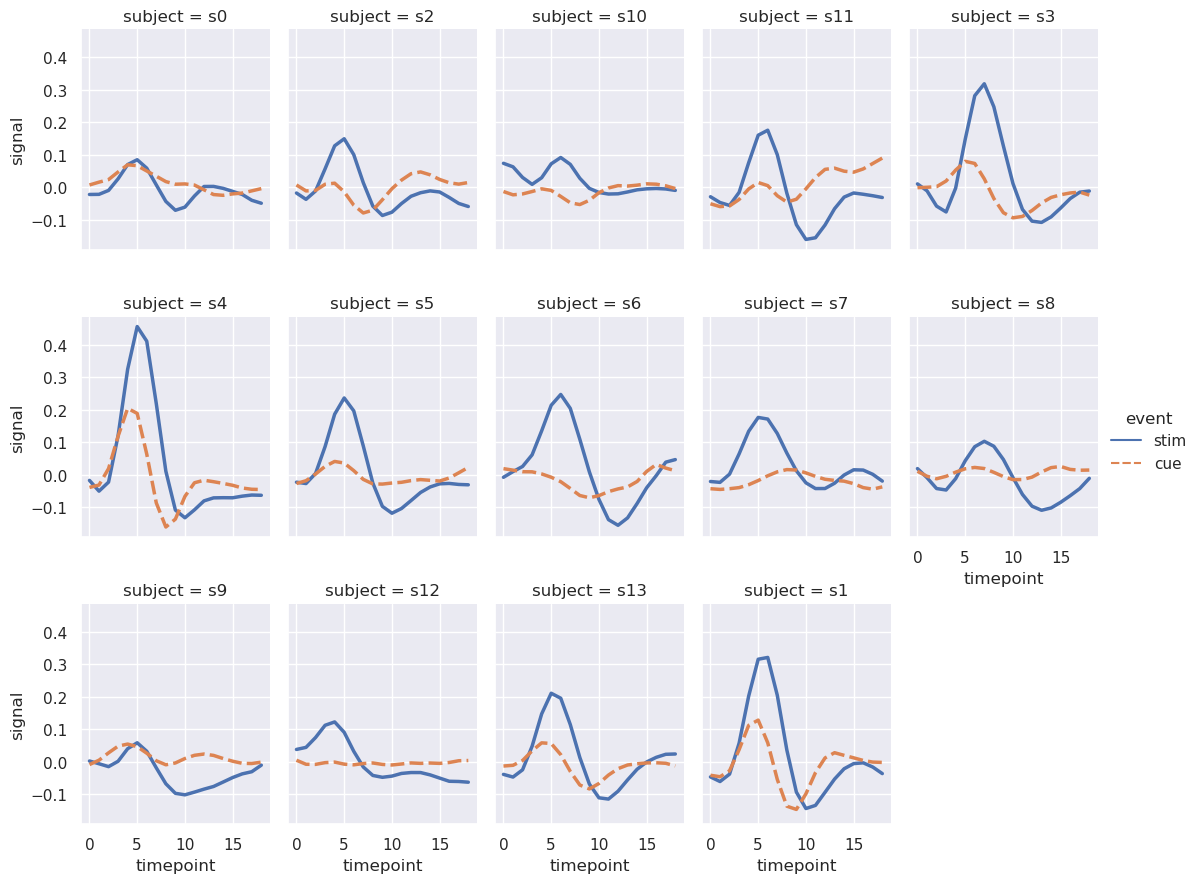

In [54]:
sns.relplot(
    data=fmri.query("region == 'frontal'"), kind="line",
    x="timepoint", y="signal", hue="event", style="event",
    col="subject", col_wrap=5,
    height=3, aspect=0.75, linewidth=2.5
)